In [2]:
import pathlib
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob
from glob import glob

In [3]:
data_dir = 'cats_and_dogs_filtered'
data_dir = pathlib.Path(data_dir)
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [4]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(val_cats_dir)))
print(len(os.listdir(val_dogs_dir)))

1000
1000
500
500


In [5]:
cats = list(data_dir.glob('*/cats/*'))


In [6]:
cats[1]

PosixPath('cats_and_dogs_filtered/train/cats/cat.946.jpg')

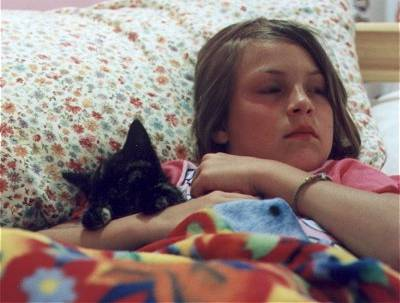

In [7]:
PIL.Image.open(cats[2])

In [24]:
batch_size = 32
img_height = 180
img_width = 180

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=(img_height, img_width))
                                             
validation_dataset = image_dataset_from_directory(val_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=(img_height, img_width))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


2022-05-03 16:31:29.288645: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


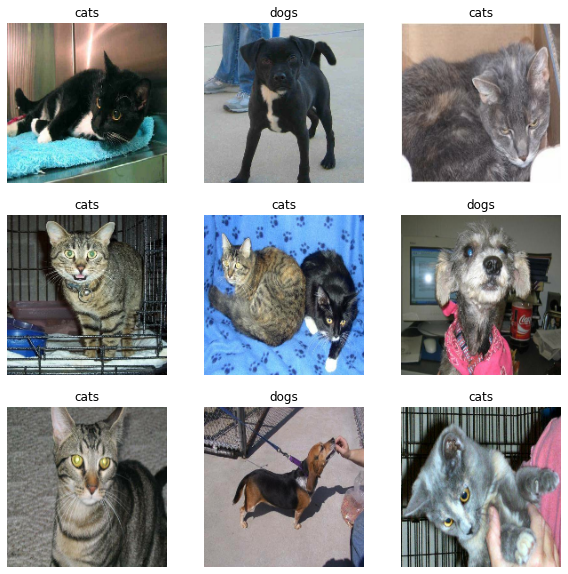

In [10]:
class_names = train_dataset.class_names

plt.figure(figsize=(10,10))
for images, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [11]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [12]:
num_classes = 2
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])

model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
epochs=10
history = model.fit(train_dataset,  
          validation_data=validation_dataset,
          epochs=epochs,) 

Epoch 1/10


2022-05-03 16:31:36.837500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.5675

2022-05-03 16:31:41.980670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 6s 92ms/step - loss: 0.7388 - accuracy: 0.5675 - val_loss: 0.6161 - val_accuracy: 0.6580
Epoch 2/10
63/63 [==============================] - 5s 84ms/step - loss: 0.5907 - accuracy: 0.6965 - val_loss: 0.5989 - val_accuracy: 0.6720
Epoch 3/10
63/63 [==============================] - 5s 83ms/step - loss: 0.4919 - accuracy: 0.7675 - val_loss: 0.6043 - val_accuracy: 0.6980
Epoch 4/10
63/63 [==============================] - 5s 84ms/step - loss: 0.4046 - accuracy: 0.8155 - val_loss: 0.6523 - val_accuracy: 0.7190
Epoch 5/10
63/63 [==============================] - 5s 83ms/step - loss: 0.3106 - accuracy: 0.8690 - val_loss: 0.6438 - val_accuracy: 0.7350
Epoch 6/10
63/63 [==============================] - 5s 85ms/step - loss: 0.2683 - accuracy: 0.8895 - val_loss: 0.7091 - val_accuracy: 0.7100
Epoch 7/10
63/63 [==============================] - 5s 83ms/step - loss: 0.1566 - accuracy: 0.9435 - val_loss: 0.9906 - val_accuracy: 0.7070
Epoch 8/10
63/63 [======

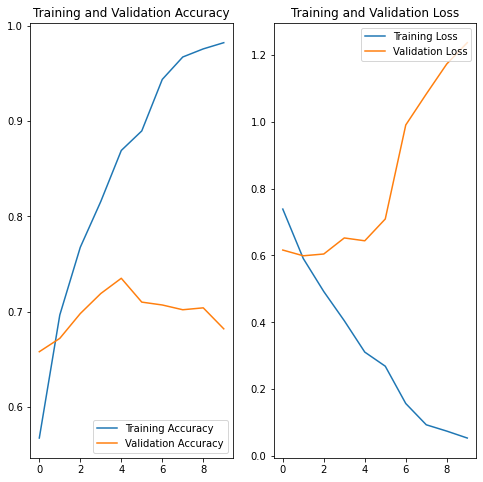

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
with tf.device('/cpu:0'):
  data_augmentation = keras.Sequential(
    [
      layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(img_height, 
                                                                img_width,
                                                                3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1),
    ]
  )

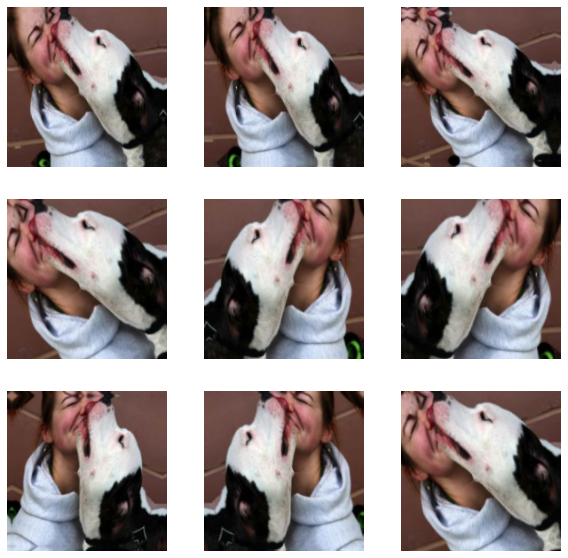

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/15


2022-05-03 16:32:55.832885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7315 - accuracy: 0.5250

2022-05-03 16:33:02.528093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 8s 117ms/step - loss: 0.7315 - accuracy: 0.5250 - val_loss: 0.6892 - val_accuracy: 0.5220
Epoch 2/15
63/63 [==============================] - 7s 114ms/step - loss: 0.6761 - accuracy: 0.5530 - val_loss: 0.6690 - val_accuracy: 0.5850
Epoch 3/15
63/63 [==============================] - 7s 115ms/step - loss: 0.6399 - accuracy: 0.6340 - val_loss: 0.6613 - val_accuracy: 0.6320
Epoch 4/15
63/63 [==============================] - 7s 114ms/step - loss: 0.6063 - accuracy: 0.6780 - val_loss: 0.5923 - val_accuracy: 0.7040
Epoch 5/15
63/63 [==============================] - 7s 117ms/step - loss: 0.5846 - accuracy: 0.6940 - val_loss: 0.5880 - val_accuracy: 0.6870
Epoch 6/15
63/63 [==============================] - 7s 112ms/step - loss: 0.5596 - accuracy: 0.7215 - val_loss: 0.5600 - val_accuracy: 0.6980
Epoch 7/15
63/63 [==============================] - 7s 110ms/step - loss: 0.5425 - accuracy: 0.7275 - val_loss: 0.5723 - val_accuracy: 0.7040
Epoch 8/15
63/63 

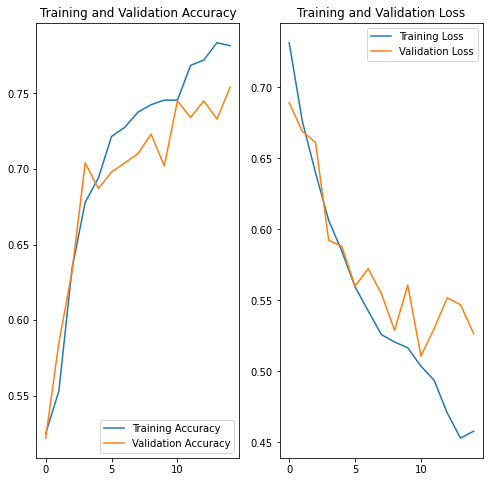

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
predict_img_path = '/Users/ganghaeseong/Desktop/images.jpeg'
img = keras.preprocessing.image.load_img(
    predict_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 53.51 percent confidence.
